# MC vs background variables

Goal: 
- Compare the training variables for the MC to background data
- Compare some other variables (end and origin vertex)

In [1]:
from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets


import sys
sys.path.append(loc.SCRIPTS)
from load_save_data import load_data, save_dataframe, save_json, get_real_vars, get_needed_vars, get_df_variables
import plot.histogram as h
from plot.tool import save_file


Welcome to JupyROOT 6.22/02


In [2]:
name_BDT = 'gradient'

## Load data with cut on $\Delta M$

Copied from `notebooks/1.BDT/4_launch_BDT_common_bkg_optimised.ipynb`

In [3]:
variables_functions = [
    ('B0_DIRA_OWNPV', 'ln(1-x)'),
    (('B0_ENDVERTEX_CHI2', 'B0_ENDVERTEX_NDOF'), 'x/y'),
    'B0_PT',
    ('B0_FDCHI2_OWNPV', 'ln(x)'),
    'B0_IP_OWNPV',
    'B0_FD_OWNPV',

    ('Dst_DIRA_OWNPV', 'ln(1-x)'),
    'Dst_PT',
    'Dst_FDCHI2_OWNPV',
    'Dst_IPCHI2_OWNPV',
    'Dst_IP_OWNPV',
    'Dst_FD_OWNPV',

    ('D0_DIRA_OWNPV', 'ln(1-x)'),
    (('D0_ENDVERTEX_CHI2', 'D0_ENDVERTEX_NDOF'), 'x/y'),
    'D0_PT',
    ('D0_FDCHI2_OWNPV', 'ln(x)'),
    ('D0_IPCHI2_OWNPV', 'ln(x)'),
    'D0_IP_OWNPV',
    'D0_FD_OWNPV',

    ('tau_DIRA_OWNPV', 'ln(1-x)'),
    (('tau_ENDVERTEX_CHI2', 'tau_ENDVERTEX_NDOF'), 'x/y'), 
    'tau_PT',
    ('tau_FDCHI2_OWNPV', 'ln(x)'),
    ('tau_IPCHI2_OWNPV', 'ln(x)'),
    'tau_IP_OWNPV',
    'tau_FD_OWNPV',

    'Dst_pion_PT',
    ('Dst_pion_IPCHI2_OWNPV', 'ln(x)'),

    'D0_kaon_PT',
    ('D0_kaon_IPCHI2_OWNPV', 'ln(x)'),

    'D0_pion_PT',
    ('D0_pion_IPCHI2_OWNPV', 'ln(x)')
]

needed_variables = get_needed_vars(variables_functions)
variables = get_real_vars(variables_functions)

    
add_variables = ['B0_M', 'tau_M', 'Dst_M', 'D0_M']

In [ ]:
df = {}
df['common'] = load_data(years,magnets,type_data = 'common'  ,vars = needed_variables+add_variables, cut_DeltaM=True, cut_PIDK=None)
df['MC']     = load_data(years,magnets,type_data = 'MC'      ,vars = needed_variables+add_variables, cut_DeltaM=True, cut_PIDK=None)

/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2015_up.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2015_down.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2016_up.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2016_down.root


In [ ]:
df['training_common'] = get_df_variables(df['common'], variables_functions)
df['training_MC'] = get_df_variables(df['MC'], variables_functions)

In [ ]:
low_bkg = 5385
high_bkg = 5570
df['bkg'] = df['training_common'].query(f'B0_M > {low_bkg} and B0_M <{high_bkg}')

In [ ]:
print(variables)

## Compare MC and background data

=====================  B0_PT =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT/gradient_bkgHighB0M/variables/B0_PT_Signal_Background
=====================  Dst_PT =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT/gradient_bkgHighB0M/variables/Dst_PT_Signal_Background
=====================  tau_PT =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT/gradient_bkgHighB0M/variables/tau_PT_Signal_Background
=====================  B0_ENDVERTEX_CHI2 =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT/gradient_bkgHighB0M/variables/B0_ENDVERTEX_CHI2_Signal_Background
=====================  tau_ENDVERTEX_CHI2 =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT/gradient_bkgHighB0M/variables/tau_ENDVERTEX_CHI2_Signal_Background
=====================  B0_OWNPV_CHI2 =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT/gradient_bkgHighB0M/variab

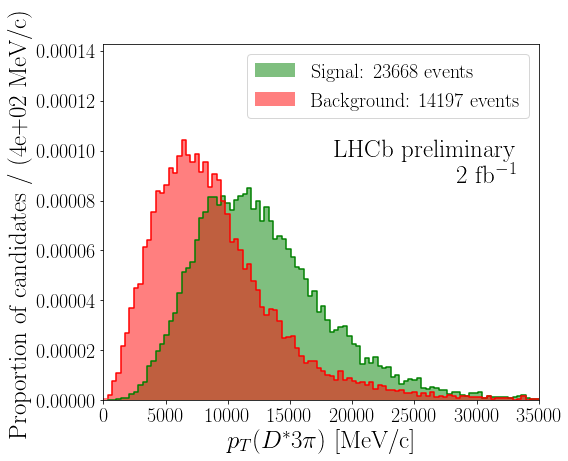

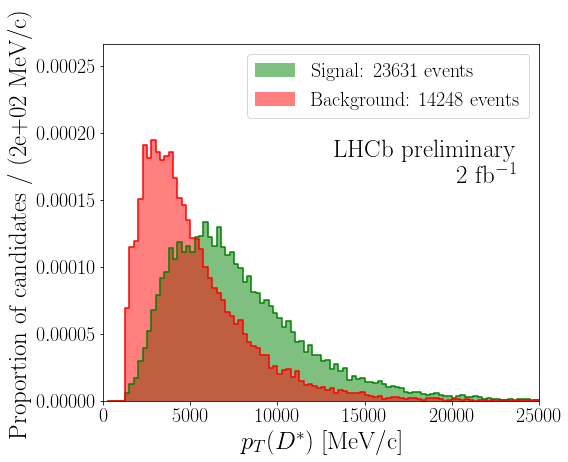

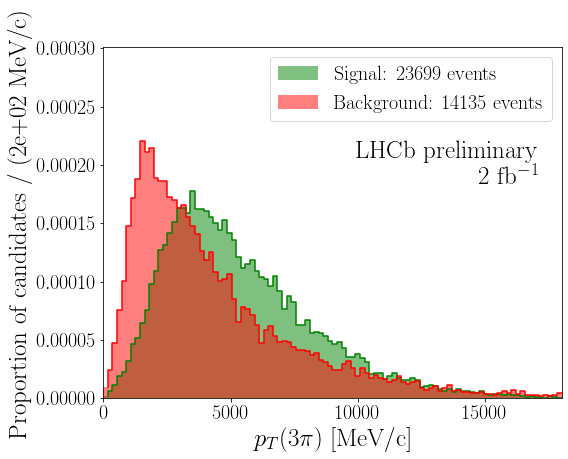

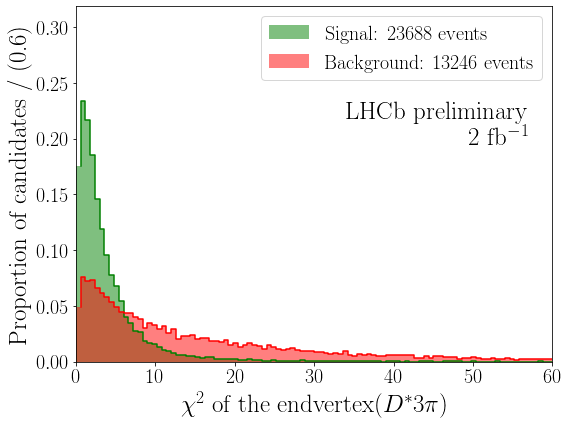

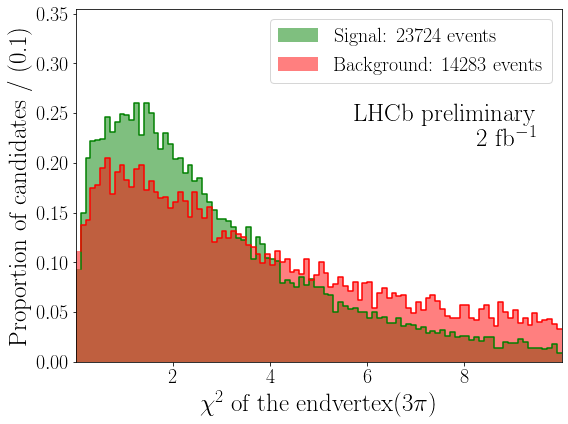

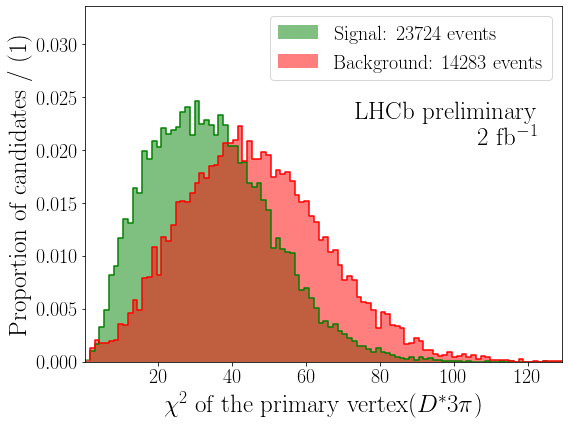

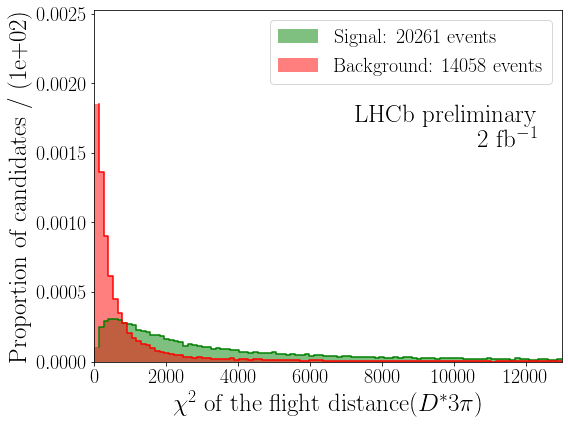

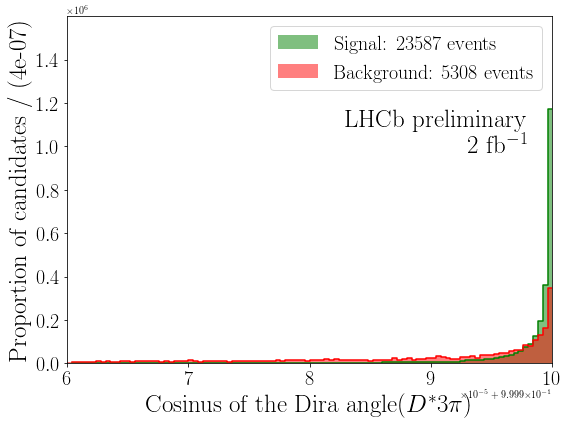

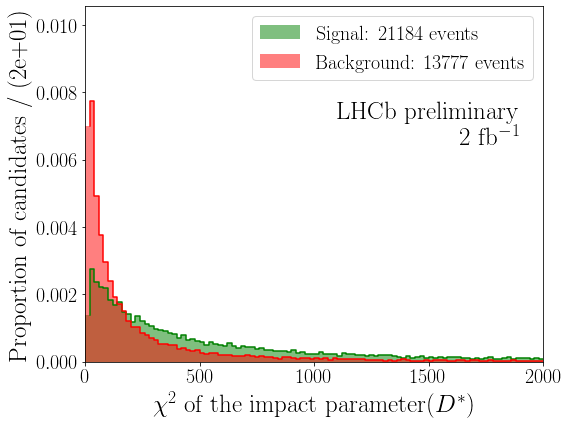

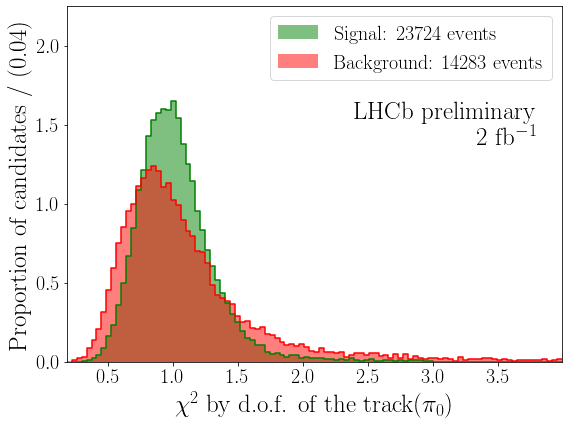

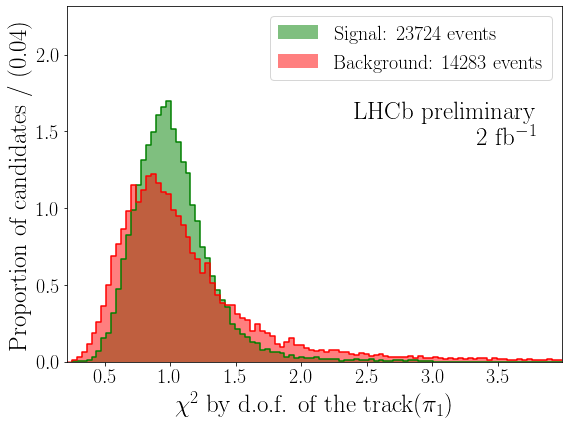

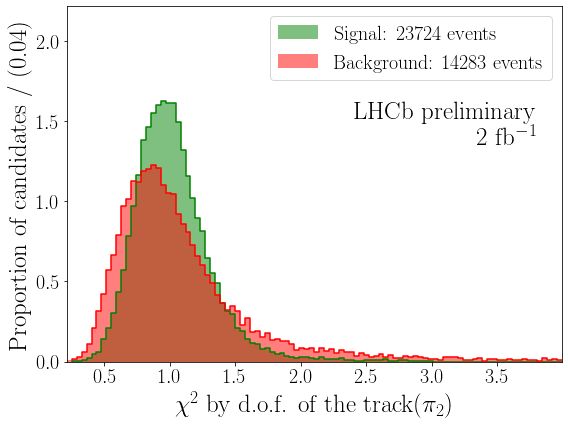

In [8]:
range_dic={
    'B0_PT': [0,35000],
    'Dst_PT':[0,25000],
    'tau_PT':[0,18000],
    'B0_ENDVERTEX_CHI2':[0,60],
    'tau_ENDVERTEX_CHI2':[None,None],
    'B0_OWNPV_CHI2':[None,None],    
    'B0_FDCHI2_OWNPV':[0, 13000], 
    'B0_DIRA_OWNPV':[0.99996, 1], 
    'Dst_IPCHI2_OWNPV':[0, 2000], 
    'tau_pion0_TRACK_CHI2NDOF':[None,None], 
    'tau_pion1_TRACK_CHI2NDOF':[None,None], 
    'tau_pion2_TRACK_CHI2NDOF':[None,None],
}

from matplotlib import rc
rc('text', usetex=True)

for variable in variables:
    print(f"=====================  {variable} =====================")
    
    if variable in range_dic:
        low = range_dic[variable][0]
        high = range_dic[variable][1]
    else:
        low = None
        high = None
        
    h.plot_hist_particle({'Signal': df['MC'], 'Background': df['bkg']}, variable, alpha=0.5, name_folder=f'BDT/{name_BDT}/variables/',
              n_bins=100, mode_hist = True, colors=['g', 'r'], low=low, high=high, pos_text_LHC=[0.95, 0.73, 'right'])

=====================  B0_DIRA_OWNPV =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT/gradient_bkgHighB0M/variables/B0_DIRA_OWNPV_Signal_Background


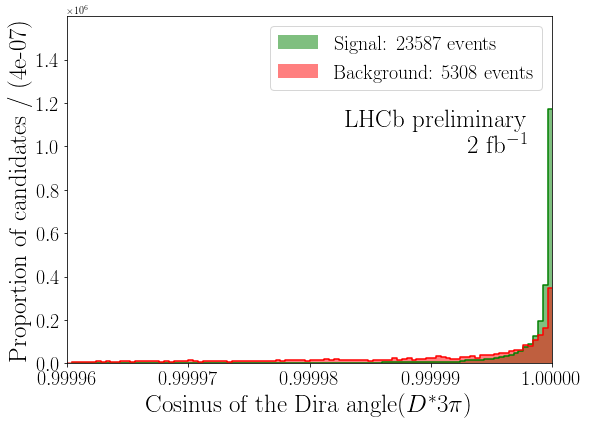

In [12]:
for variable in variables[7:8]:
    print(f"=====================  {variable} =====================")
    
    if variable in range_dic:
        low = range_dic[variable][0]
        high = range_dic[variable][1]
    else:
        low = None
        high = None
        
    fig, ax = h.plot_hist_particle({'Signal': df['MC'], 'Background': df['bkg']}, variable, alpha=0.5,
              n_bins=100, mode_hist = True, colors=['g', 'r'], low=low, high=high, pos_text_LHC=[0.95, 0.73, 'right'], save_fig=False)
    ax.get_xaxis().get_major_formatter().set_useOffset(False)
    save_file(fig, f'{variable}_Signal_Background',name_folder=f'BDT/{name_BDT}/variables/')

# Comparison of some variables

### End vertex of $B^0$ and end vertes of $D^*$

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT/gradient_bkgHighB0M/variables/\chi^2_of_the_end_vertex_B^0_D^{*-}


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$\\chi^2$ of the end vertex', ylabel='Proportion of candidates / (1)'>)

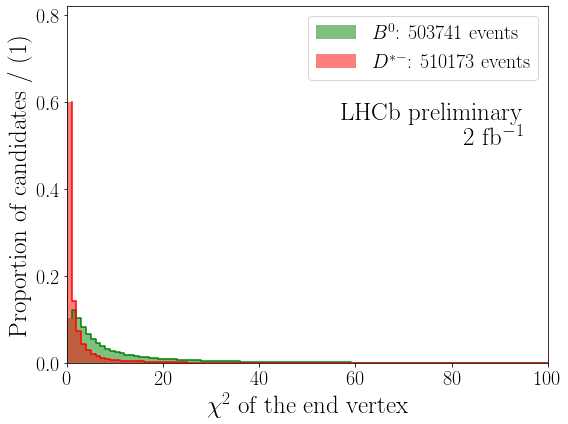

In [25]:
h.plot_hist_var([df['common']['B0_ENDVERTEX_CHI2'], df['common']['Dst_ENDVERTEX_CHI2']], 
                '$\chi^2$ of the end vertex', 
                name_datas = ['$B^0$','$D^{*-}$'], high=100,
                alpha=0.5, name_folder=f'BDT/{name_BDT}/variables/',
              n_bins=100, mode_hist = True, colors=['g', 'r', 'b'], pos_text_LHC=[0.95, 0.73, 'right'])

### Own primary vertex of $B^0$, $D^*$ and $3\pi$

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT/gradient_bkgHighB0M/variables/Own_primary_vertex_D^{*-}_B^0_3\pi


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='Own primary vertex', ylabel='Proportion of candidates / (2)'>)

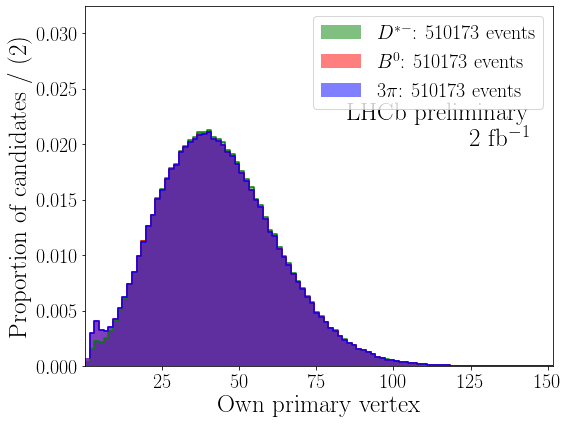

In [18]:
h.plot_hist_var([df['common']['B0_OWNPV_CHI2'], df['common']['Dst_OWNPV_CHI2'], df['common']['tau_OWNPV_CHI2'],], 
                'Own primary vertex', 
                name_datas = ['$D^{*-}$', '$B^0$', '$3\pi$'],
                alpha=0.5, name_folder=f'BDT/{name_BDT}/variables/',
              n_bins=100, mode_hist = True, colors=['g', 'r', 'b'], pos_text_LHC=[0.95, 0.73, 'right'])